In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
import json
from scipy import stats
import random
##
import os
from glob import glob


In [6]:
import  EDA_Functions

In [17]:

edadata = pd.read_csv('Data/Data_for_EDA.csv').drop(columns = ['Unnamed: 0'])
cgdd = pd.read_csv('Data/cgdd_20day_Beta002.csv').drop(columns = ['Unnamed: 0'])
time = pd.read_csv('Data/all_Optical_20day_Beta002.csv').drop(columns = ['Unnamed: 0'])

In [8]:
numeric_df_cols = EDA_Functions.get_numeric_columns(df)
numeric_df  = df[numeric_df_cols]
numeric_df

,0__B1,0__B2,0__B3,0__B4,0__B5,0__B6,0__B7,0__B8,0__B8A,0__B9,...,t_max_NDYI,maxGradient_NDYI,inf_1_NDYI,t_inf_1_NDYI,minGradient_NDYI,inf_2_NDYI,t_inf_2_NDYI,mean_NDYI,delta_NDYI,fgp_NDYI
0,1574.000000,1710.800000,1789.000000,1422.800000,1989.200000,3097.800000,3326.800000,3988.000000,3487.200000,4055.800000,...,11,0.209355,0.227677,8,-0.171395,0.117799,11,-0.003105,0.061516,3
1,4284.666667,4106.000000,4034.666667,3875.333333,4220.666667,5031.000000,5449.333333,5637.333333,5517.333333,7696.000000,...,16,0.228962,0.233051,8,-0.273956,-0.151900,2,0.009004,0.108603,8
2,10585.666667,9953.333333,9350.666667,9042.666667,9569.666667,9091.333333,8886.333333,8942.666667,8717.333333,14447.666667,...,5,0.213671,0.201019,2,-0.212254,0.093462,5,0.009124,0.104698,3
3,1141.500000,1137.000000,1407.000000,1795.000000,1959.500000,2061.500000,2088.000000,2102.000000,2177.500000,3036.500000,...,140,0.302938,0.283891,138,-0.268830,-0.039664,9,0.037415,0.032122,2
4,1828.500000,1679.000000,1744.000000,1914.000000,2205.000000,2447.000000,2585.000000,2593.000000,2798.500000,4147.000000,...,6,0.295964,0.257376,136,-0.330523,-0.042417,7,0.014279,0.100146,-130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4620,3586.666667,3654.000000,3811.333333,3754.666667,3861.666667,4329.666667,4580.000000,4775.333333,4764.333333,3211.000000,...,7,0.153584,0.168328,6,-0.106730,0.024402,19,0.000154,0.000000,1
4621,3334.600000,3280.000000,3148.400000,2893.200000,3250.800000,4274.600000,4720.400000,5111.200000,4869.600000,7196.800000,...,18,0.103828,0.101300,2,-0.211478,0.033223,18,0.005247,0.143401,16
4622,7448.666667,6520.000000,6258.666667,6242.666667,6694.333333,6521.666667,6516.333333,6287.333333,6470.333333,11712.333333,...,14,0.255159,0.223368,120,-0.228522,0.043795,14,0.013792,0.048949,-106
4623,2328.200000,2209.400000,2175.600000,2064.000000,2447.400000,3186.400000,3541.200000,3503.200000,3688.000000,5008.000000,...,133,0.179165,0.162939,23,-0.180503,-0.017563,24,0.004984,0.068751,110


## 1.SINGLE AGGREGATIONS

### 1.1 Same time, Same bands, Multiple points

In [12]:
# 1. describe band
def single(df, time,band):
    df = EDA_Functions.single_timestep(df,time = time,other=False)
    return df[band]
    
df = edadata
print(single(df , 2,'NDVI').describe())
print(single(df , 18,'B3').describe())


count    4625.000000
mean        0.045909
std         0.059225
min        -0.027078
25%         0.012271
50%         0.029208
75%         0.061002
max         0.549311
Name: NDVI, dtype: float64
count     4625.000000
mean      3919.463546
std       2088.144163
min         90.666667
25%       2357.500000
50%       3511.000000
75%       5000.800000
max      15976.000000
Name: B3, dtype: float64


In [19]:
# 2. check empty bands 

df = time
null_columns = df.columns[df.isnull().all()].tolist()
print(null_columns)
assert len(null_columns) == 0

[]


In [28]:
a = cgdd.isnull().sum()
a.name = 'null values'
a

0__B1            0
0__B2            0
0__B3            0
0__B4            0
0__B5            0
              ... 
83__B8A       2934
83__B9        2934
83__B11       2934
83__B12       2934
83__CLDPRB    2934
Name: null values, Length: 1095, dtype: int64

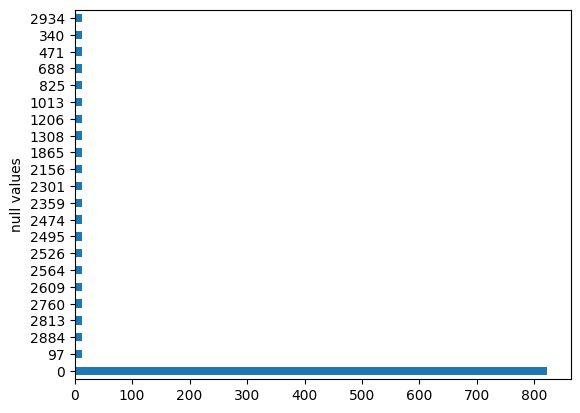

In [30]:

EDA_Functions.bar_hist(pd.DataFrame(a) , col = 'null values')

<Axes: >

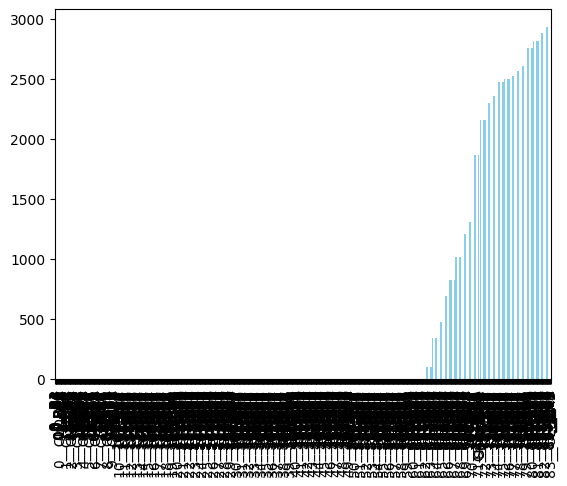

In [31]:
# SPL USECASE 4 - emptiness, Cloudiness of every timestep , as a bar graph 
# 

In [23]:
ctype = 'Rapeseed'
time = 10
band = 'NDVI' 
EDA_Functions.single_timestep(df[df.Crop_Type == ctype],time = timestep,other=False)[band].describe()

count    585.000000
mean       0.054745
std        0.060863
min       -0.117377
25%        0.022153
50%        0.036104
75%        0.068872
max        0.331599
Name: NDVI, dtype: float64

### Unsupervised

### Supervised

## DOUBLE AGGREGATIONS

### Unsupervised

### Supervised

In [7]:
timesteps = [0,1,2,3,4,5,6,7,8,9,10]
months = ['Oct 22','Nov 22','Dec 22','Jan 23','Feb 23','Mar 23','Apr 23','May 23', 'Jun 23', 'July 23','Aug 23']


In [6]:
from EDA_Functions import plot_skewness 

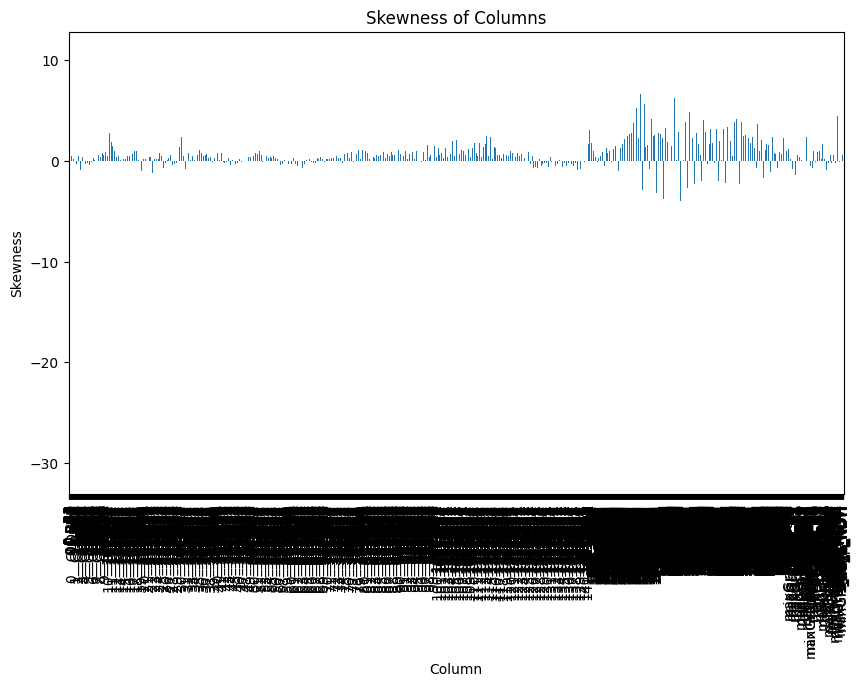

In [26]:
plot_skewness(numeric_df)

## Functions

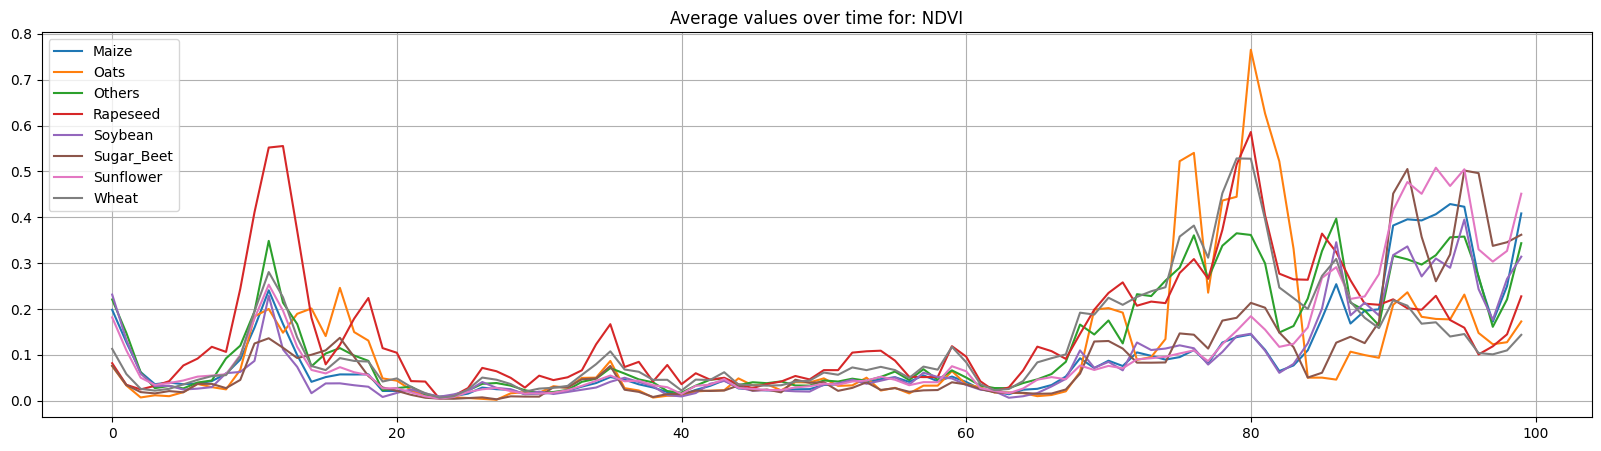

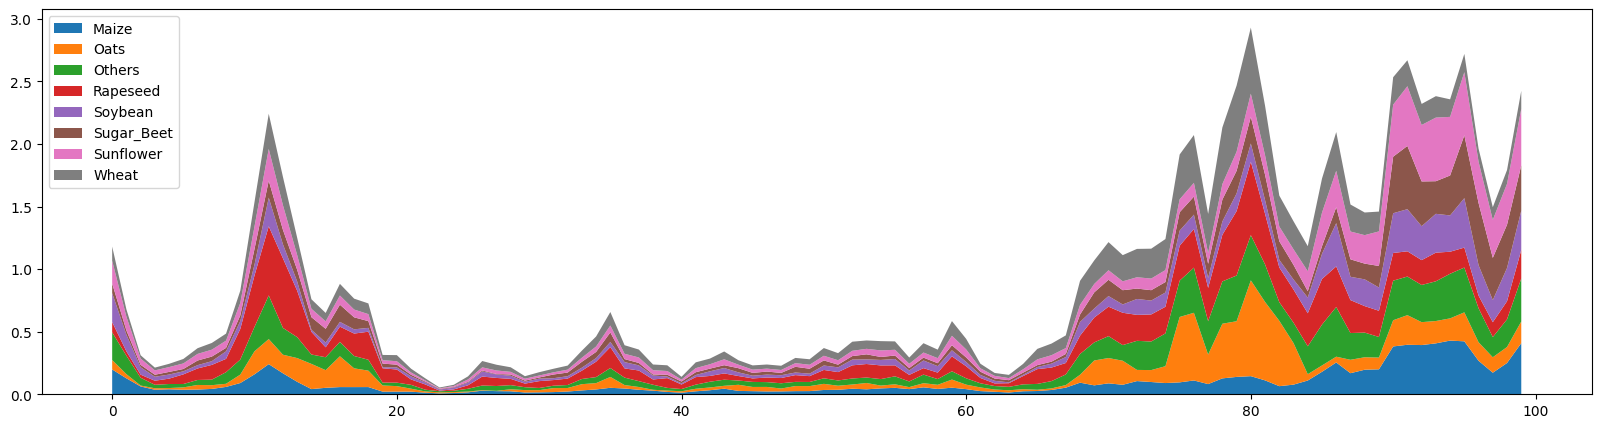

In [12]:
band_series_by_croptype(df,'NDVI')

C:\Users\kashy\anaconda3\envs\RemoteSensing\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kashy\anaconda3\envs\RemoteSensing\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kashy\anaconda3\envs\RemoteSensing\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kashy\anaconda3\envs\RemoteSensing\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

([0.11317554877715703,
  0.05821131945819352,
  0.026031545990053428,
  0.02214132843124746,
  0.026032975960291665,
  0.03577258442626752,
  0.04561831927062282,
  0.05381553358713278,
  0.05599315846065426,
  0.09714811233855002,
  0.19538932169160128,
  0.2806731343268393,
  0.22577232032045103,
  0.13801468729257885,
  0.07585009101967609,
  0.06688761120200414,
  0.0930703372509185,
  0.08688007098386619,
  0.08550711054624369,
  0.041986862799845655,
  0.04882517814171075,
  0.03012866923597403,
  0.016524193254355713,
  0.006648107899247343,
  0.009995682410563138,
  0.024804744132133728,
  0.05062777403375447,
  0.04596142786976725,
  0.03650522320598694,
  0.01998825018159081,
  0.02654089210142227,
  0.028369851719962463,
  0.03245084983650987,
  0.05643057625555192,
  0.07980038333922432,
  0.10785146919983446,
  0.0682327518431724,
  0.06327383496637894,
  0.04559025645067538,
  0.04576100441471495,
  0.022456976988719433,
  0.04614144525012158,
  0.045321734341126275,
  0.

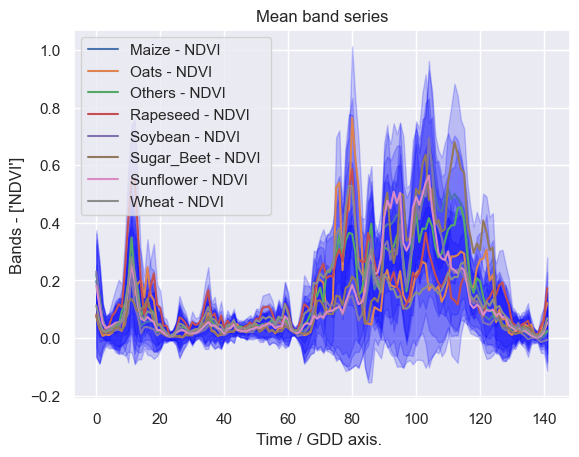

In [15]:
plot_mean_std(df,bands = ['NDVI'], croptypes = np.unique(df.Crop_Type))

In [9]:
## Helper functions

#print(single_timestep(sampled0,3))


def get_sample_timeseries(df,index,bands,fid=False,plot=False):
  '''
  Use this function to get several time series.
  -> Index can be a list of indexes, bands can be a list of bands
  If fid is True, use index as fid instead of Dataframe index. (This is useful for getting all NSamples )

  If there are multiple bands, use different figures for plotting,.

  Return type is a 3d numpy array. 1st dimension is the bands. 2nd is the indexes. 3rd is the timeseries.

  FUTURE: implement color scheme for fid- TRUE and multiple indexes.

  '''
  if(type(index)==int):
    index = [index]  #Make sure index is always a list, as we want newdf to always be a dataframe (and not a series)
  if(type(bands)==str):
    bands  = [bands]

  if(fid):
    newdf = df[df['fid'].isin(index)]
  else:
    newdf = df.iloc[index]

  return_array = []
  newdf = newdf.reset_index(drop=True)
  band_figure = 0
  for band in bands: #runs atleast once.
    if(plot):
      band_figure += 1
      plt.figure(band_figure)
      plt.title("BAND:{}".format(band))
    columns = [str(time)+'_'+band for time in timesteps]
    single_band = newdf[columns]
    l = []
    for row in single_band.iterrows():
      l.append(row[1].values)
      plt.plot(months, row[1] , label = row[0] ) if plot else 0


    plt.legend() if not fid else -1 , plt.show() if plot else 0
    # Plot only if plot is True. Additionally, if fid is true, don't add legend, because it's cluttered.

    return_array.append(l)
  return np.array(return_array)







## Data preprocessing
# Everything about changing the actual data.


<Axes: ylabel='CropName'>

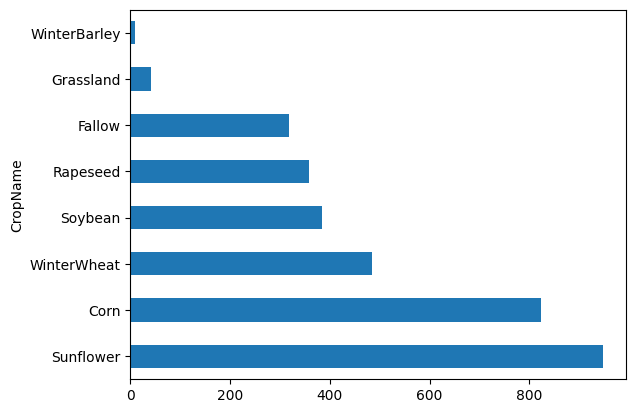

### Part 1: Unsupervised


#### Skewness of columns

In [41]:
COLS = [col for col in Train_1.columns if re.match(r'[0-9]',col)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


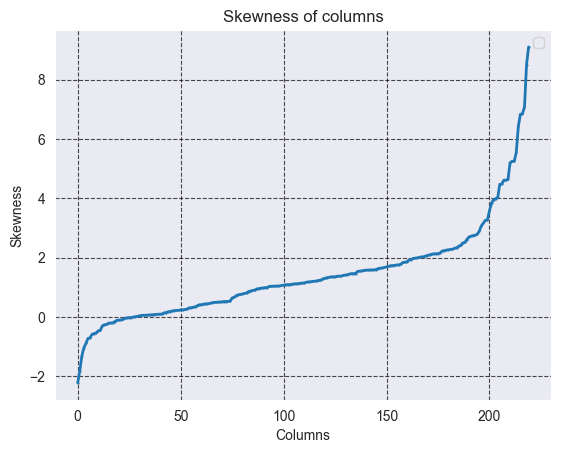

In [42]:
# Skewness of columns
cols = Train_1[COLS].skew().sort_values()
mi  = cols[:10]
ma = cols[-10:]
mid = cols[len(cols)//2 - 5 : len(cols)//2+5]
sns.set_style("darkgrid")
plt.plot(cols.values,linewidth=2, marker='.', markersize=1)
plt.title("Skewness of columns")
plt.grid(True,color='Black',linestyle='--', alpha=0.7)
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.legend()

In [37]:
highskew = list(mi.index.values) +  list(ma.index.values)
lowskew = list(mid.index.values)

In [38]:
lowskew

['1_B12',
 '10_B12',
 '7_NDRE',
 '0_B5',
 '7_VV',
 '1_B11',
 '7_B9',
 '8_B6',
 '9_B11',
 '0_B8A']

C:\Users\kashy\anaconda3\envs\RemoteSensing\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


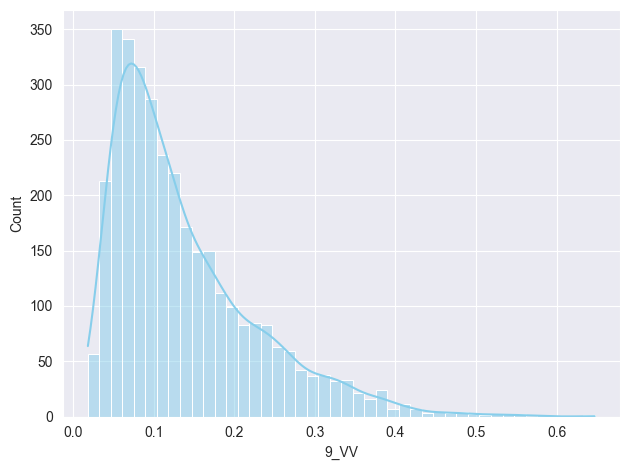

In [39]:
plot_histogram(Train_1[['9_VV']])

#### Outliers in each column

#### Variance

In [44]:
Train_1[COLS].var().sort_values()

3_VH        0.000015
4_VH        0.000018
5_VH        0.000021
2_VH        0.000032
1_VH        0.000050
             ...    
7_VV_VH    43.064520
3_VV_VH    45.907045
6_VV_VH    51.890553
2_VV_VH    53.777290
4_VV_VH    64.934957
Length: 220, dtype: float64

C:\Users\kashy\AppData\Local\Temp\ipykernel_11212\3372657011.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.lineplot(Train_1.var().sort_values().values)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


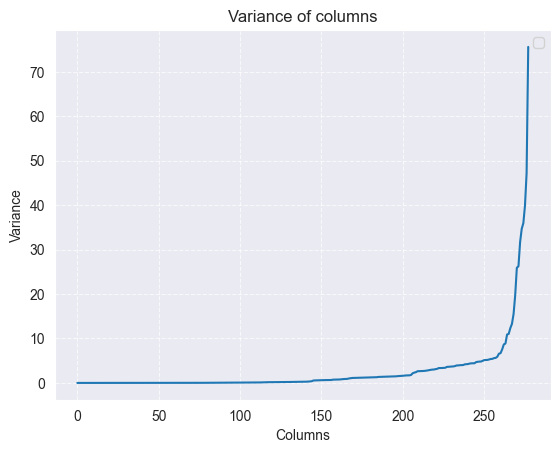

In [22]:
sns.lineplot(Train_1.var().sort_values().values)
plt.title("Variance of columns")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Columns')
plt.ylabel('Variance')
plt.legend()

#### Timeseries


### Part 2: w.r.t target column

In [31]:
Train_1[highskew].corrwith(Train_1.CropCode).sort_values

<bound method Series.sort_values of t_max_SAVI   -0.376460
t_max_NDVI   -0.379061
t_max_NDRE   -0.389489
inf_1_NDWI   -0.058000
2_NDWI       -0.136799
t_max_NDYI   -0.336783
4_NDWI       -0.033478
1_NDWI       -0.223138
fgp_NDRE      0.078076
max_NDVI     -0.137902
8_B3         -0.008032
0_B1          0.090238
7_B2         -0.213499
7_B1         -0.206794
9_B4          0.168612
9_B5          0.173584
9_B1          0.029573
9_B2          0.053434
9_B3          0.069580
4_VV_VH      -0.068735
dtype: float64>

In [32]:
Train_1[lowskew].corrwith(Train_1.CropCode).sort_values

<bound method Series.sort_values of 7_B7            0.482176
7_VV_VH        -0.402506
10_B4           0.306373
10_B11          0.350533
3_B11          -0.017459
7_B6            0.479266
t_inf_2_NDYI    0.111770
7_VV            0.080139
10_VV          -0.294887
mean_NDRE       0.429994
dtype: float64>

In [33]:
Train_1.drop(columns = ['CropCode']).corrwith(Train_1.CropCode).sort_values()

C:\Users\kashy\AppData\Local\Temp\ipykernel_11212\3596959069.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Train_1.drop(columns = ['CropCode']).corrwith(Train_1.CropCode).sort_values()


VisualCode         -0.847673
minGradient_NDVI   -0.521864
minGradient_SAVI   -0.509217
7_B12              -0.505774
t_inf_1_NDRE       -0.500683
                      ...   
7_NDRE              0.498173
mean_SAVI           0.513882
mean_NDVI           0.517635
7_NDVI              0.525889
7_SAVI              0.527425
Length: 277, dtype: float64

C:\Users\kashy\AppData\Local\Temp\ipykernel_11212\4281777314.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.lineplot(Train_1.drop(columns = ['CropCode']).corrwith(Train_1.CropCode).sort_values().values)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


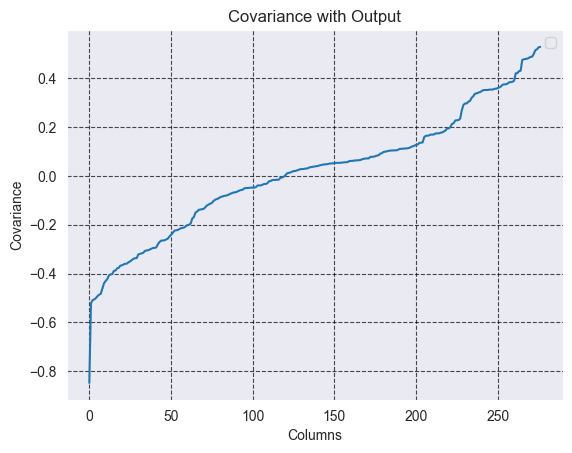

In [34]:
sns.lineplot(Train_1.drop(columns = ['CropCode']).corrwith(Train_1.CropCode).sort_values().values)
sns.set_style("darkgrid")
plt.title("Covariance with Output")
plt.grid(True,color='Black',linestyle='--', alpha=0.7)
plt.xlabel('Columns')
plt.ylabel('Covariance')
plt.legend()

In [36]:
month_id = 8
month_features = [feature for feature in Train_processed.columns if  re.match(fr'{month_id}', feature)]
len(month_features)

15

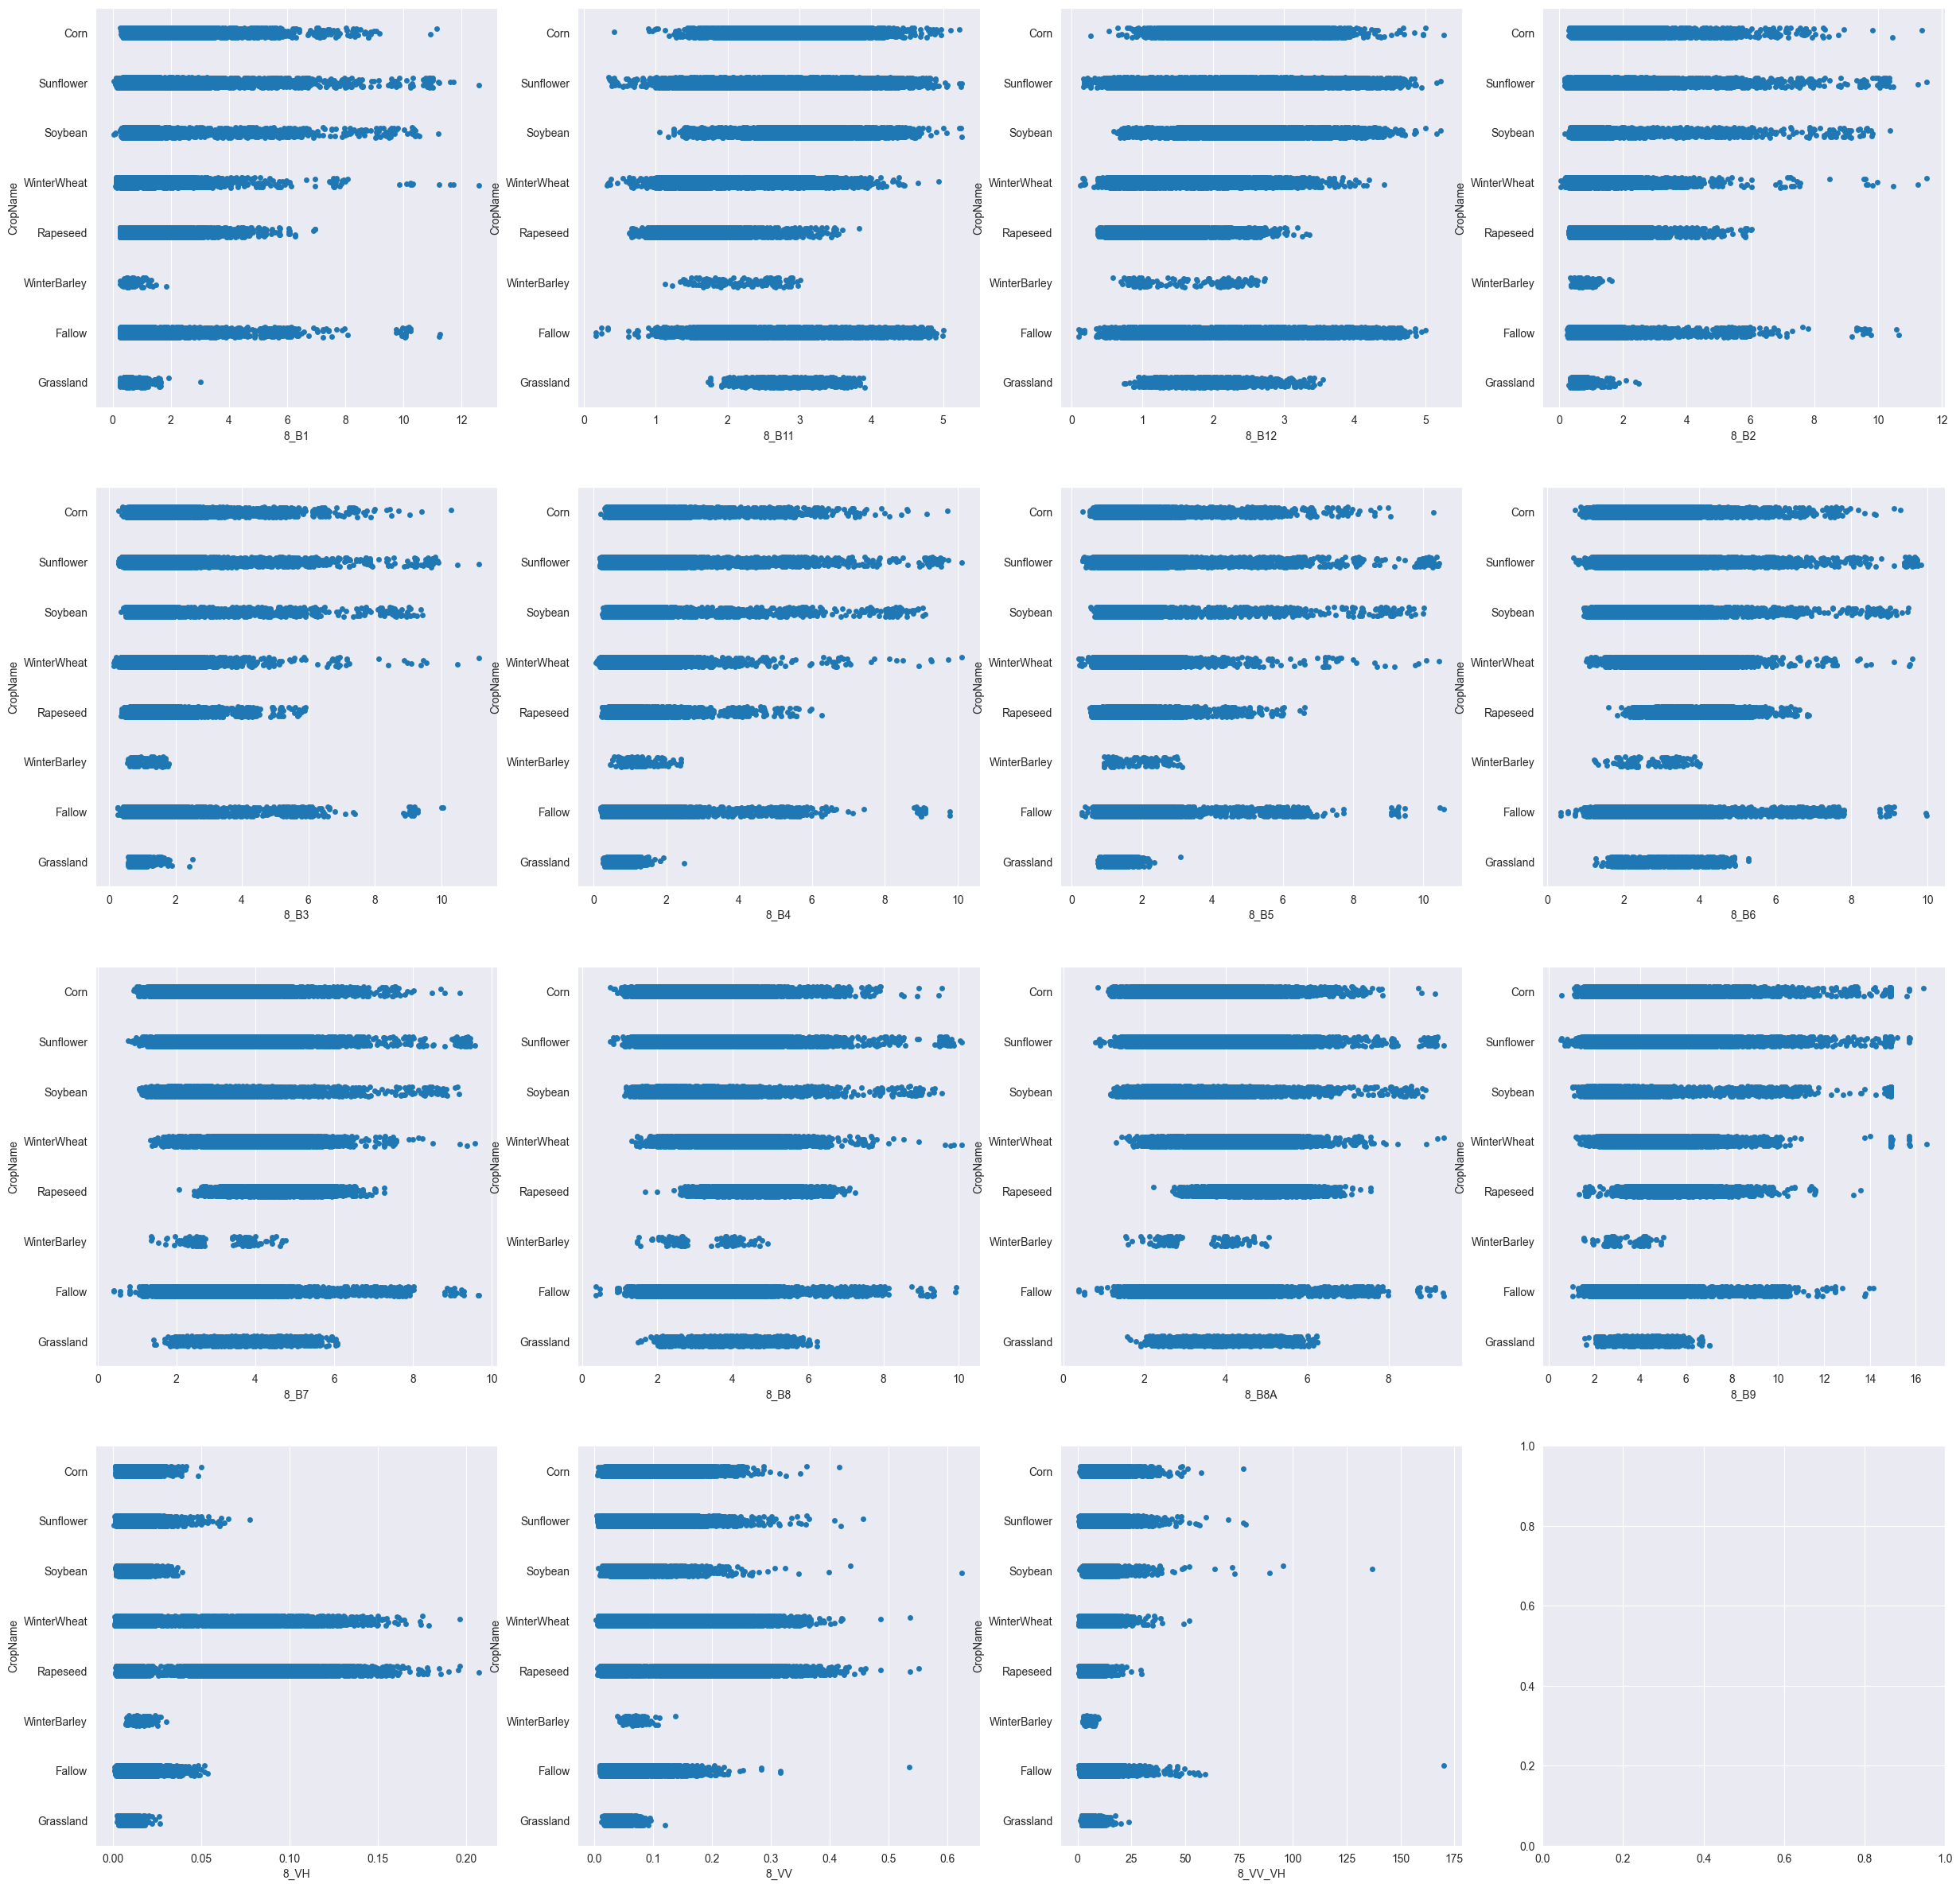

In [37]:
fig, ax = plt.subplots(4, 4, figsize=(30, 30))
for variable, subplot in zip(Train_processed[month_features], ax.flatten()):
    sns.stripplot(x = Train_processed[variable], y = Train_processed['CropName'], ax=subplot)